In This homework You will take a data set and build a model from the data to predict the target and evaluate the preformance using cross validation and grid search. If you are building a classification model you should adress which measure of accuracy is important and incorperate that in your analysis. There are four datasets that have been provided. Information for each of them can be found here:

Climate failure (pop_failures_fixed.dat):

https://archive.ics.uci.edu/dataset/252/climate+model+simulation+crashes

Forest Fires (forestfires.csv)

https://archive.ics.uci.edu/dataset/162/forest+fires

Wine Quality (winequality-white.csv,whinequality-red.csv)

https://archive.ics.uci.edu/dataset/186/wine+quality

If you wnat to choose your own dataset you can use the following link:

https://archive.ics.uci.edu/datasets

You should first state the question you are trying to answer whith the model and then read in the data and make sure that the data is cleaned and ready for modeling. 

Next you may want to do some exploratory data analysis and convert and or scale any features you may want to use. You do not need to use all the fetures in the dataset, but you should have an explaination for any features that you drop.

Next build an appropriate model to answer your question. Determine how well your model can answer your question  using cross-validation and grid search.

Finally communicate your findings in a few paragraphs.

## Question: What features are significant for predicting red wine quality? What features, if any, are noise, or distractors? ##

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_selection import mutual_info_classif, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

df_wine_red = pd.read_csv("winequality-red.csv", sep=';')
# df_wine_white=pd.read_csv("winequality-white.csv", sep=';')
# df_fires=pd.read_csv('forestfires.csv')
# df_pop=pd.read_csv('pop_failures_fixed.dat',sep=',')

### Data Preprocessing, Model Creation (tune hyperparameters with grid search and cross validation), and Basic Analysis ###

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

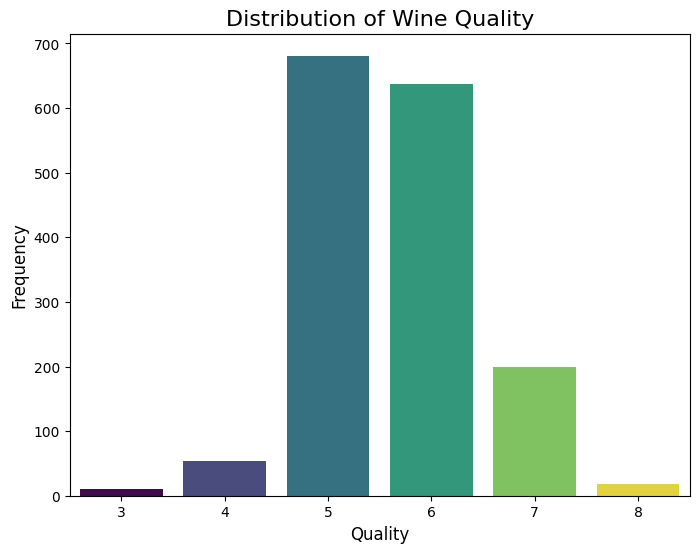


Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 4, 'n_estimators': 175}

Dummy Model Accuracy: 0.425
Dummy Model Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.42      1.00      0.60       204
           6       0.00      0.00      0.00       192
           7       0.00      0.00      0.00        60
           8       0.00      0.00      0.00         5

    accuracy                           0.42       480
   macro avg       0.07      0.17      0.10       480
weighted avg       0.18      0.42      0.25       480


Random Forest Accuracy: 0.6792
Random Forest Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.73      0.81      0.77       204
           6       0.

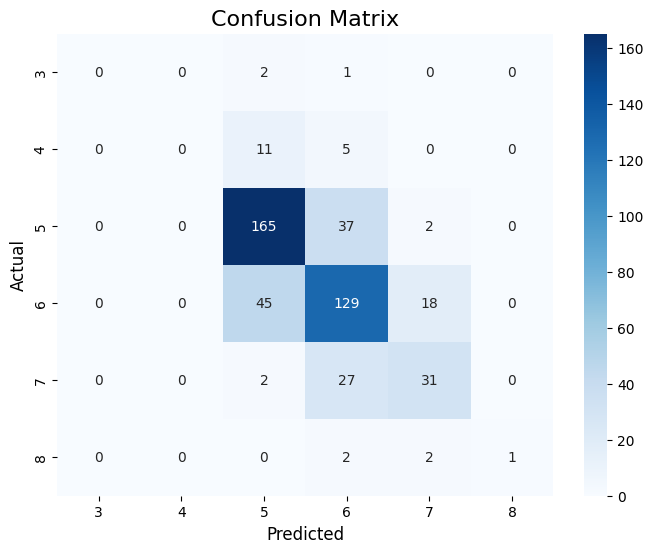


Cross-Validation Accuracy Scores: [0.67857143 0.70535714 0.66071429 0.70089286 0.67264574]
Mean CV Accuracy: 0.6836


In [25]:
# Display some data, statistics, and summary info
print(df_wine_red.describe())
print("\n", df_wine_red.head())

# Calculate and Display the frequency of each quality rating
quality_counts = df_wine_red['quality'].value_counts().sort_index()
print("\n", quality_counts)

# Visualize the target variable (quality) distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=df_wine_red['quality'], hue=df_wine_red['quality'], legend=False, palette='viridis')
plt.title('Distribution of Wine Quality', fontsize=16)
plt.xlabel('Quality', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Data Preprocessing
# Features and target split
target = df_wine_red['quality']  # Extract target
features = df_wine_red.drop('quality', axis=1)  # Extract features

# Train-test split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=7, stratify=target)

# Feature scaling (Standard: Mean = 0, Std = 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build model and tune hyperparameter using Grid Search
rf = RandomForestClassifier(class_weight='balanced', random_state=7)

# Define hyperparameters to tune
grid_tune = {
    'n_estimators': [100, 125, 150, 175, 200],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 4, 6, 8, 10]
}

# Grid Search with Cross-Validation (cv=5)
grid_search = GridSearchCV(estimator=rf, param_grid=grid_tune, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters
print("\nBest Hyperparameters:", grid_search.best_params_)

# Get the best model
best_rf = grid_search.best_estimator_

# Create a dummy classifier using the 'most_frequent' strategy for baseline model comparison
dummy_model = DummyClassifier(strategy='most_frequent')

# Fit the dummy model, predict on the test set, and get the accuracy score
dummy_model.fit(X_train, y_train)
dummy_pred = dummy_model.predict(X_test)

# Get and display accuracy score for Dummy model
dummy_accuracy = accuracy_score(y_test, dummy_pred)
print(f"\nDummy Model Accuracy: {dummy_accuracy}")

# Display lassification report for the Dummy model
print("Dummy Model Classification Report:")
print(classification_report(y_test, dummy_pred, zero_division=0))

# Evaluate the model
# Predict on the test set
rf_pred = best_rf.predict(X_test_scaled)

# Get and display accuracy score for Random Forest model
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f'\nRandom Forest Accuracy: {rf_accuracy:.4f}')

# Display classification report for Random Forest model
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred, zero_division=0))

# Make and display Confusion Matrix
conf_matrix = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y_test.unique()), yticklabels=sorted(y_test.unique()))
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

# Get and display Cross-Validation Scores
cv_scores = cross_val_score(best_rf, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"\nCross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")


### Feature Analysis: Determining the Best (most important) Features for Predicting Wine Quality ###

In [ ]:
# Get the feature importance scores using provided measure of feature importance (based on how much each feature contributes to reducing the prediction error)
importances = best_rf.feature_importances_
feature_names = features.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)  # Print feature importance

# Plot the feature importance
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()  # Show most important features at the top
plt.show()

# Compute mutual information between each feature and the target
mutual_info_scores = mutual_info_classif(X_train, y_train)

# Create a DataFrame for mutual info
mutual_info_df = pd.DataFrame({
    'Feature': feature_names,
    'MI Score': mutual_info_scores
}).sort_values(by='MI Score', ascending=False)

print(mutual_info_df)  # Print the mutual information scores

# Plot the mutual information scores for visualization
plt.figure(figsize=(10,6))
plt.barh(mutual_info_df['Feature'], mutual_info_df['MI Score'])
plt.xlabel('Mutual Information Score')
plt.ylabel('Feature')
plt.title('Mutual Information of Features')
plt.gca().invert_yaxis()  # Show most informative features at the top
plt.show()

# Use the Random Forest Classifier to perform Recursive Feature Elimination
rfe = RFE(estimator=best_rf, n_features_to_select=8)  # Select top 5 features

# Fit the RFE model and get feature rankings
rfe.fit(X_train, y_train)
ranking = rfe.ranking_

# Create DataFrame for RFE rankings
rfe_features_df = pd.DataFrame({
    'Feature': feature_names,
    'Rank': ranking
}).sort_values(by='Rank')

# Print the features selected by RFE
print("Selected Features by RFE:")
print(rfe_features_df[rfe_features_df['Rank'] == 1])

# Plot feature ranks
plt.figure(figsize=(10,6))
plt.barh(rfe_features_df['Feature'], rfe_features_df['Rank'])
plt.xlabel('Rank')
plt.ylabel('Feature')
plt.title('Feature Ranks by Recursive Feature Elimination (RFE)')
plt.gca().invert_yaxis()  # Show top ranked features at the top
plt.show()

# Create a regularized Logistic Regression model using Lasso (switch to Ridge: penalty='l2')
lasso_model = make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', solver='liblinear'))

# Fit the model and get the coefficients
lasso_model.fit(X_train, y_train)
coefficients = lasso_model.named_steps['logisticregression'].coef_

# Create DataFrame for coefficients from the Lasso Logistic Regresseion model
lasso_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients.flatten()
}).sort_values(by='Coefficient', ascending=False)

print(lasso_importance_df)  # Print the coefficients

# Plot the coefficients
plt.figure(figsize=(10,6))
plt.barh(lasso_importance_df['Feature'], lasso_importance_df['Coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance from Lasso Logistic Regression')
plt.gca().invert_yaxis()
plt.show()

# Calculate correlation between each feature and the target variable
correlation_matrix = pd.concat([features, target], axis=1).corr()
target_correlation = correlation_matrix['quality'].drop('quality')

print(target_correlation)  # Print feature correlation with the target

# Plot the correlation
plt.figure(figsize=(10,6))
target_correlation.plot(kind='barh')
plt.xlabel('Correlation with Target')
plt.ylabel('Feature')
plt.title('Correlation of Features with Wine Quality')
plt.show()

### Feature Testing: What are the Best Features, and Which Features are not Important? ###

In [ ]:
# Create list of the best features identified above
best_features = []

# Create a new training/testing set with only the best features
X_train_best = X_train[best_features]
X_test_best = X_test[best_features]

# Train the model using only the selected features and make predictions on the test set
best_rf.fit(X_train_best, y_train)
rf_pred_best = best_rf.predict(X_test_best)

# Display classification report for Random Forest model using selected features
print("Model Performance with Selected Features:")
print(classification_report(y_test, rf_pred_best))

# Get and display accuracy score for Random Forest model using selected features
accuracy_best = accuracy_score(y_test, rf_pred_best)
print(f"Accuracy with Selected Features: {accuracy_best}")
